<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), Data Scientist at Mail.ru Group <br>
    All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.
You may use this material for any purpose (you can edit, correct and use it as example) exept commercial use with mandatory citation of author.

# <center> Assignment #4 (demo).
## <center>  Exploring OLS, Lasso and Random Forest in a regression task
    
<img src=https://habrastorage.org/webt/-h/ns/aa/-hnsaaifymavmmudwip9imcmk58.jpeg width=30%>

**Fill in the missing code and choose answers in [this](https://docs.google.com/forms/d/1aHyK58W6oQmNaqEfvpLTpo6Cb0-ntnvJ18rZcvclkvw/edit) web form.**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
sns.set_theme(style='ticks')

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

**We are working with UCI Wine quality dataset (no need to download it – it's already there, in course repo and in Kaggle Dataset).**

## Wine Dataset Attributes Guide

This guide provides an overview of the attributes present in the wine dataset, along with their meanings and significance in the context of wine quality and characteristics.

###  Attributes Table

| Attribute            | Description                                                 | Significance                                                |
|----------------------|-------------------------------------------------------------|-------------------------------------------------------------|
| Fixed Acidity        | Acids that do not readily evaporate                         | Affects acidity, tartness, and structural balance           |
| Volatile Acidity     | Amount of acetic acid; high levels can lead to vinegar taste | Impacts wine flavor and quality                             |
| Citric Acid          | Adds freshness and flavor to wines                         | Enhances taste and sensory characteristics                  |
| Residual Sugar       | Sugar remaining after fermentation stops                   | Determines wine sweetness and mouthfeel                     |
| Chlorides            | Amount of salt in the wine                                  | Influences taste balance and overall flavor                 |
| Free Sulfur Dioxide  | Prevents microbial growth and oxidation                    | Important for wine preservation and aging potential         |
| Total Sulfur Dioxide | Sum of free and bound SO2 forms                             | Affects aroma, taste, and stability                         |
| Density              | Influenced by alcohol and sugar content                    | Indicates wine composition and potential alcohol content   |
| pH                   | Measures wine acidity or basicity                           | Impacts stability, microbial activity, and taste perception |
| Sulphates            | Wine additive contributing to SO2 levels                   | Influences preservation, taste, and potential health       |



In [2]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
data = pd.read_csv(DATA_PATH + "winequality-white.csv", sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data = data.drop_duplicates()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


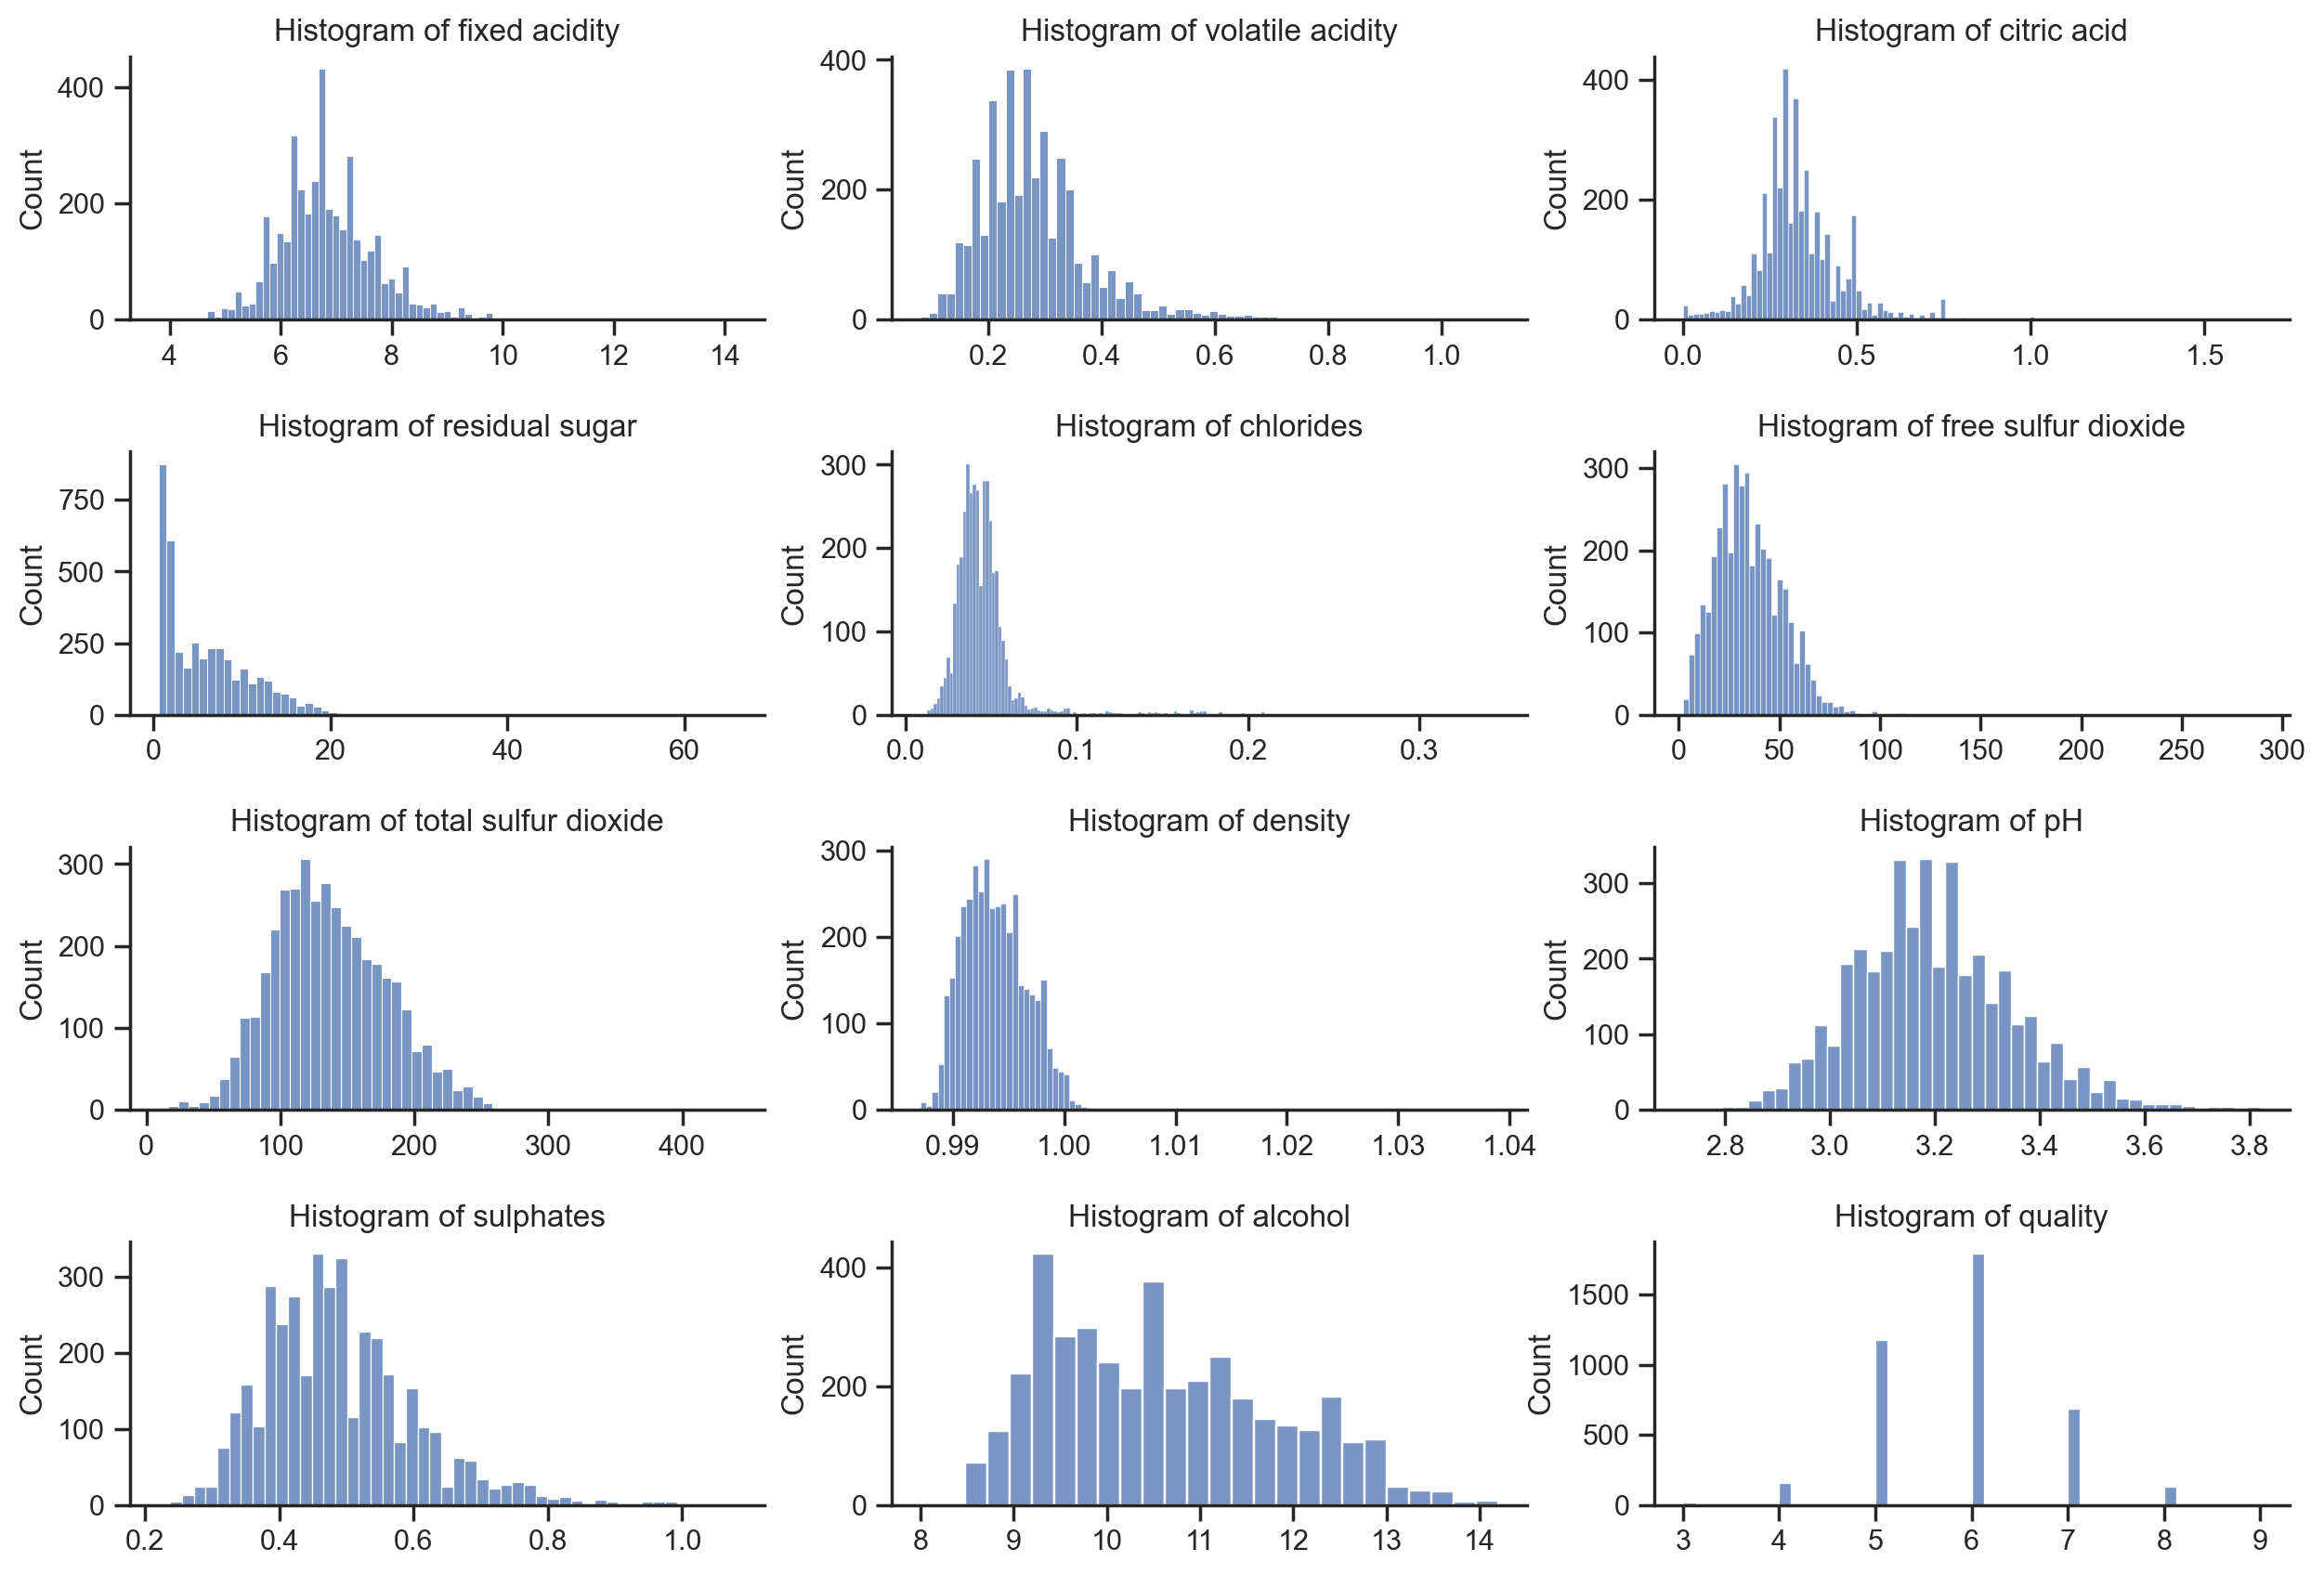

In [27]:
cols = data.columns.to_list()

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
for i, col in enumerate(cols):
    sns.histplot(data=data, x=col, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Histogram of {col}')
    axes[i // 3, i % 3].set_xlabel('')
    sns.despine()

# Adjust spacing between subplots and titles
plt.subplots_adjust(top=0.5, hspace=0.5)

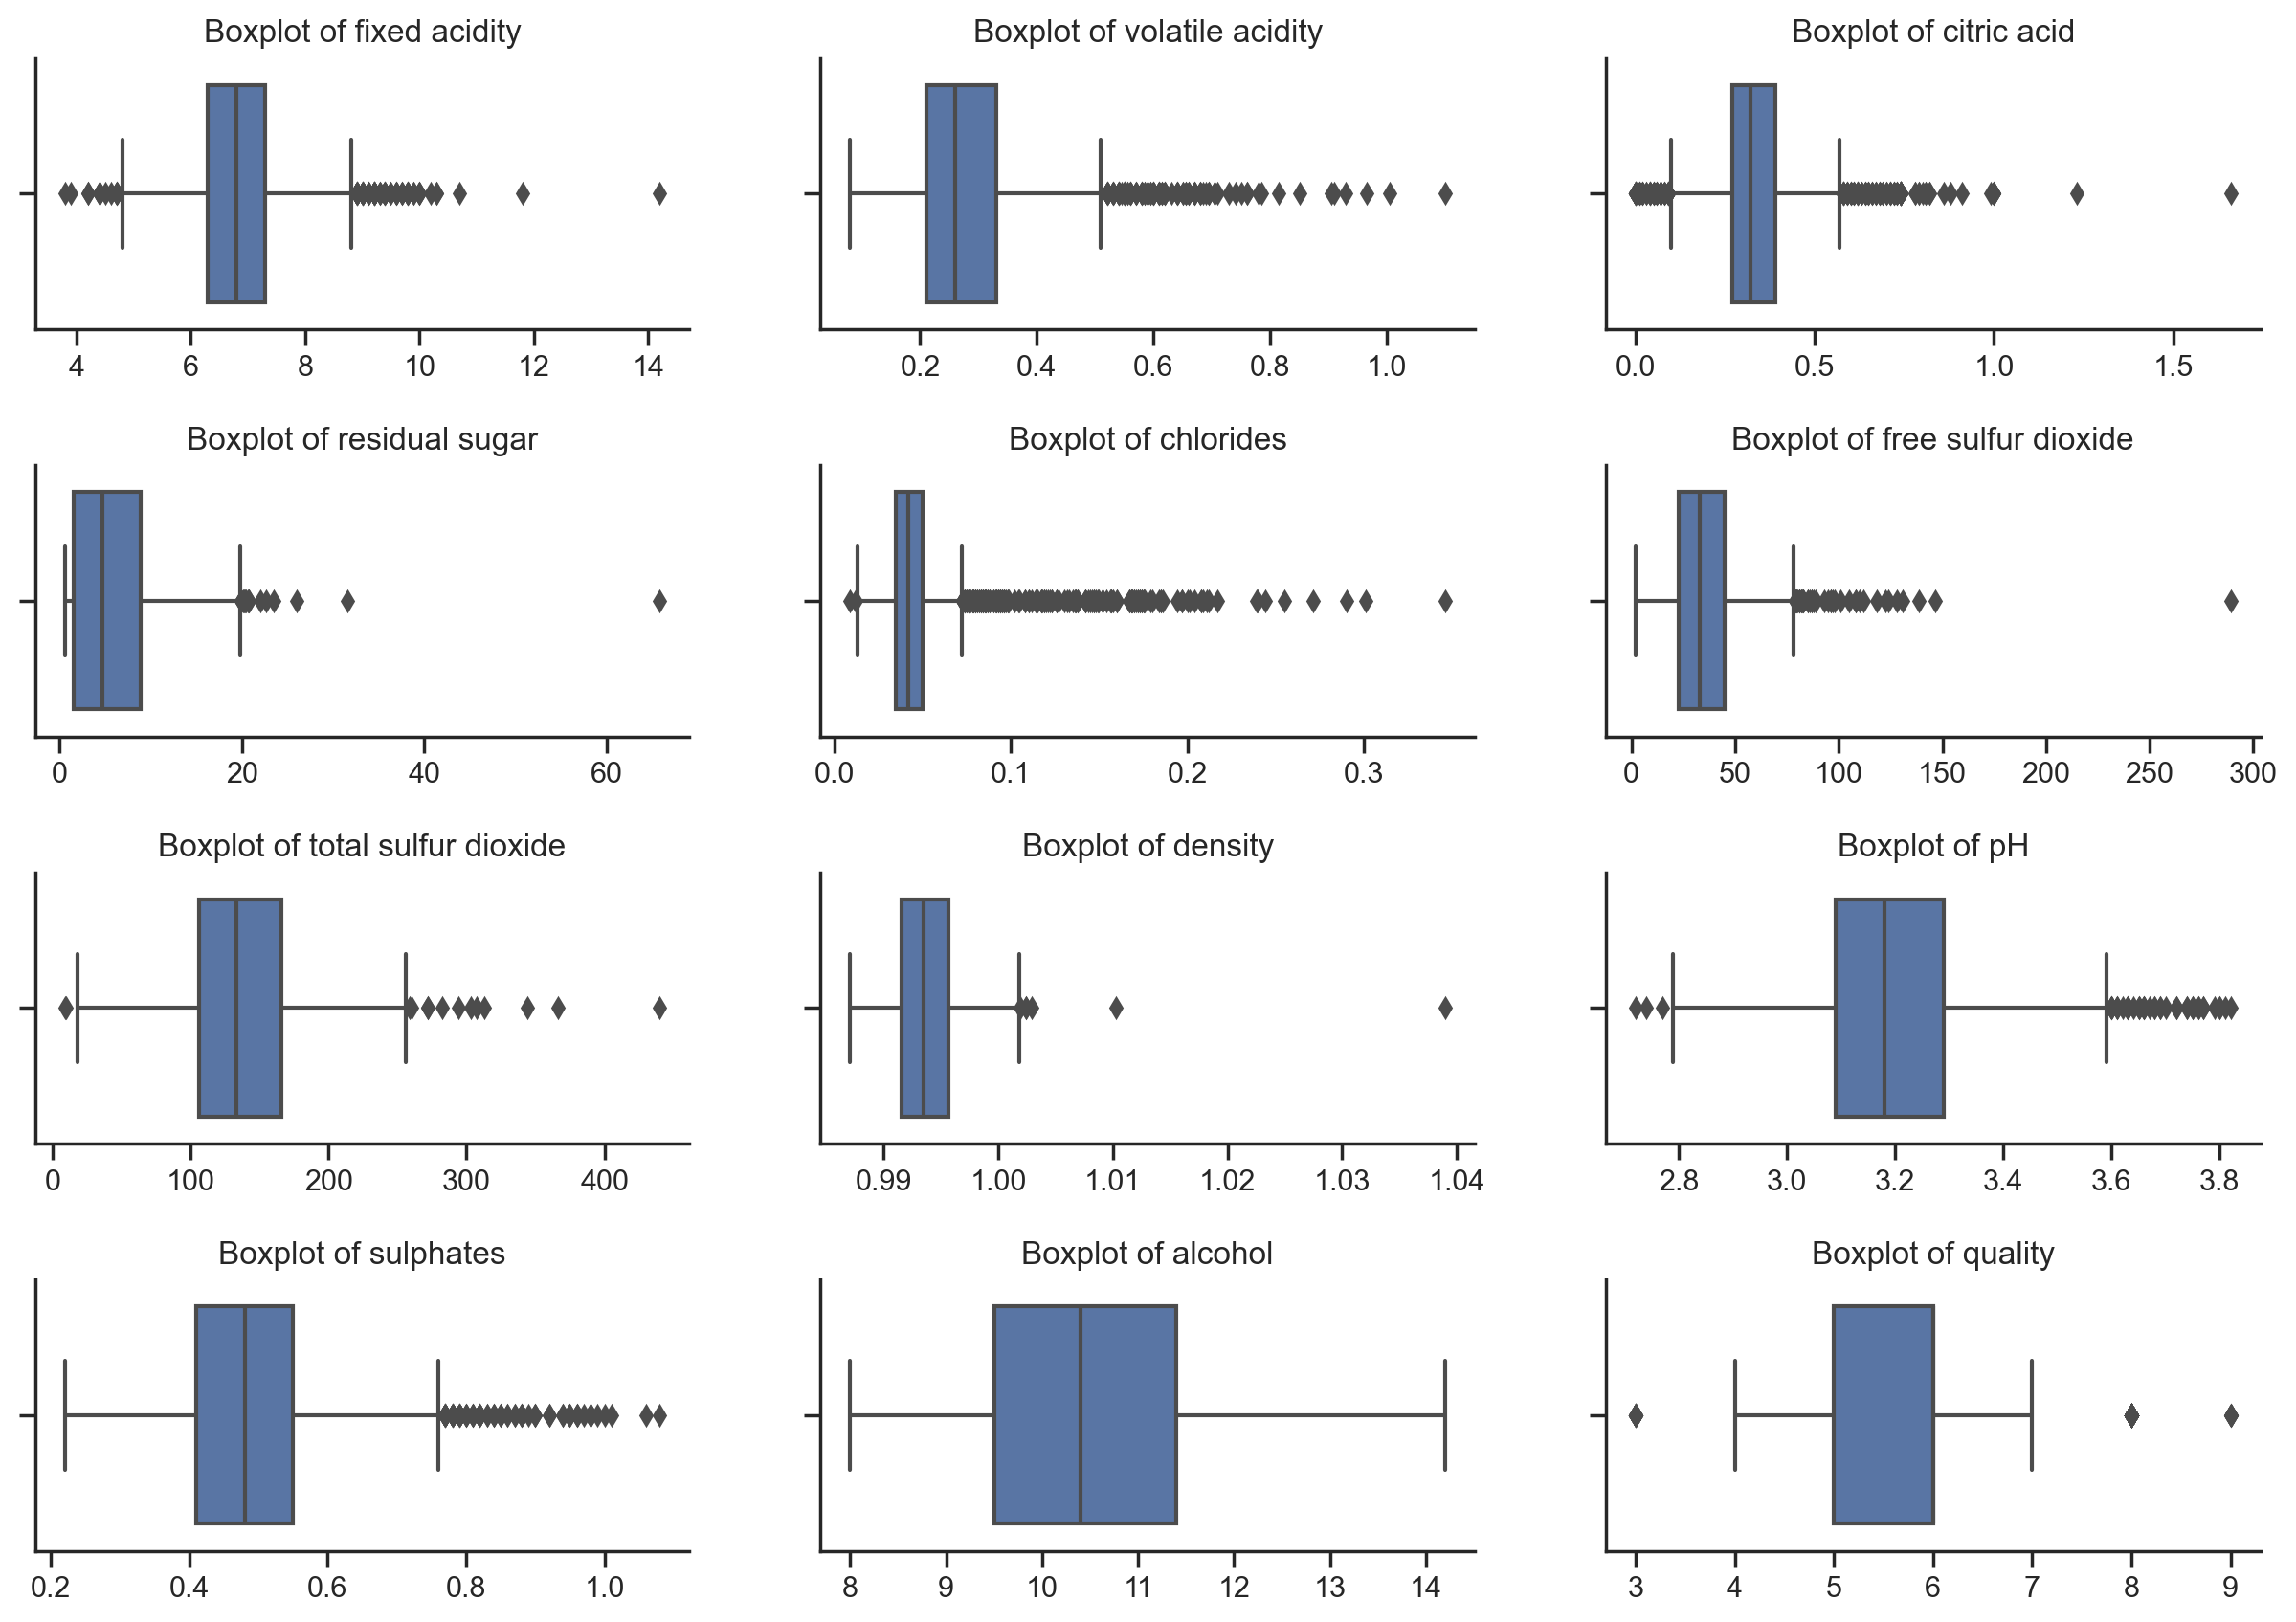

In [26]:
cols = data.columns.to_list()

_, ax = plt.subplots(4,3, figsize=(15,20))
for i, col in enumerate(cols):
    sns.boxplot(data=data, x=col, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Boxplot of {col}')
    ax[i//3, i%3].set_xlabel('')
    sns.despine()
# Adjust spacing between subplots and titles
plt.subplots_adjust(top=0.5, hspace=0.5)

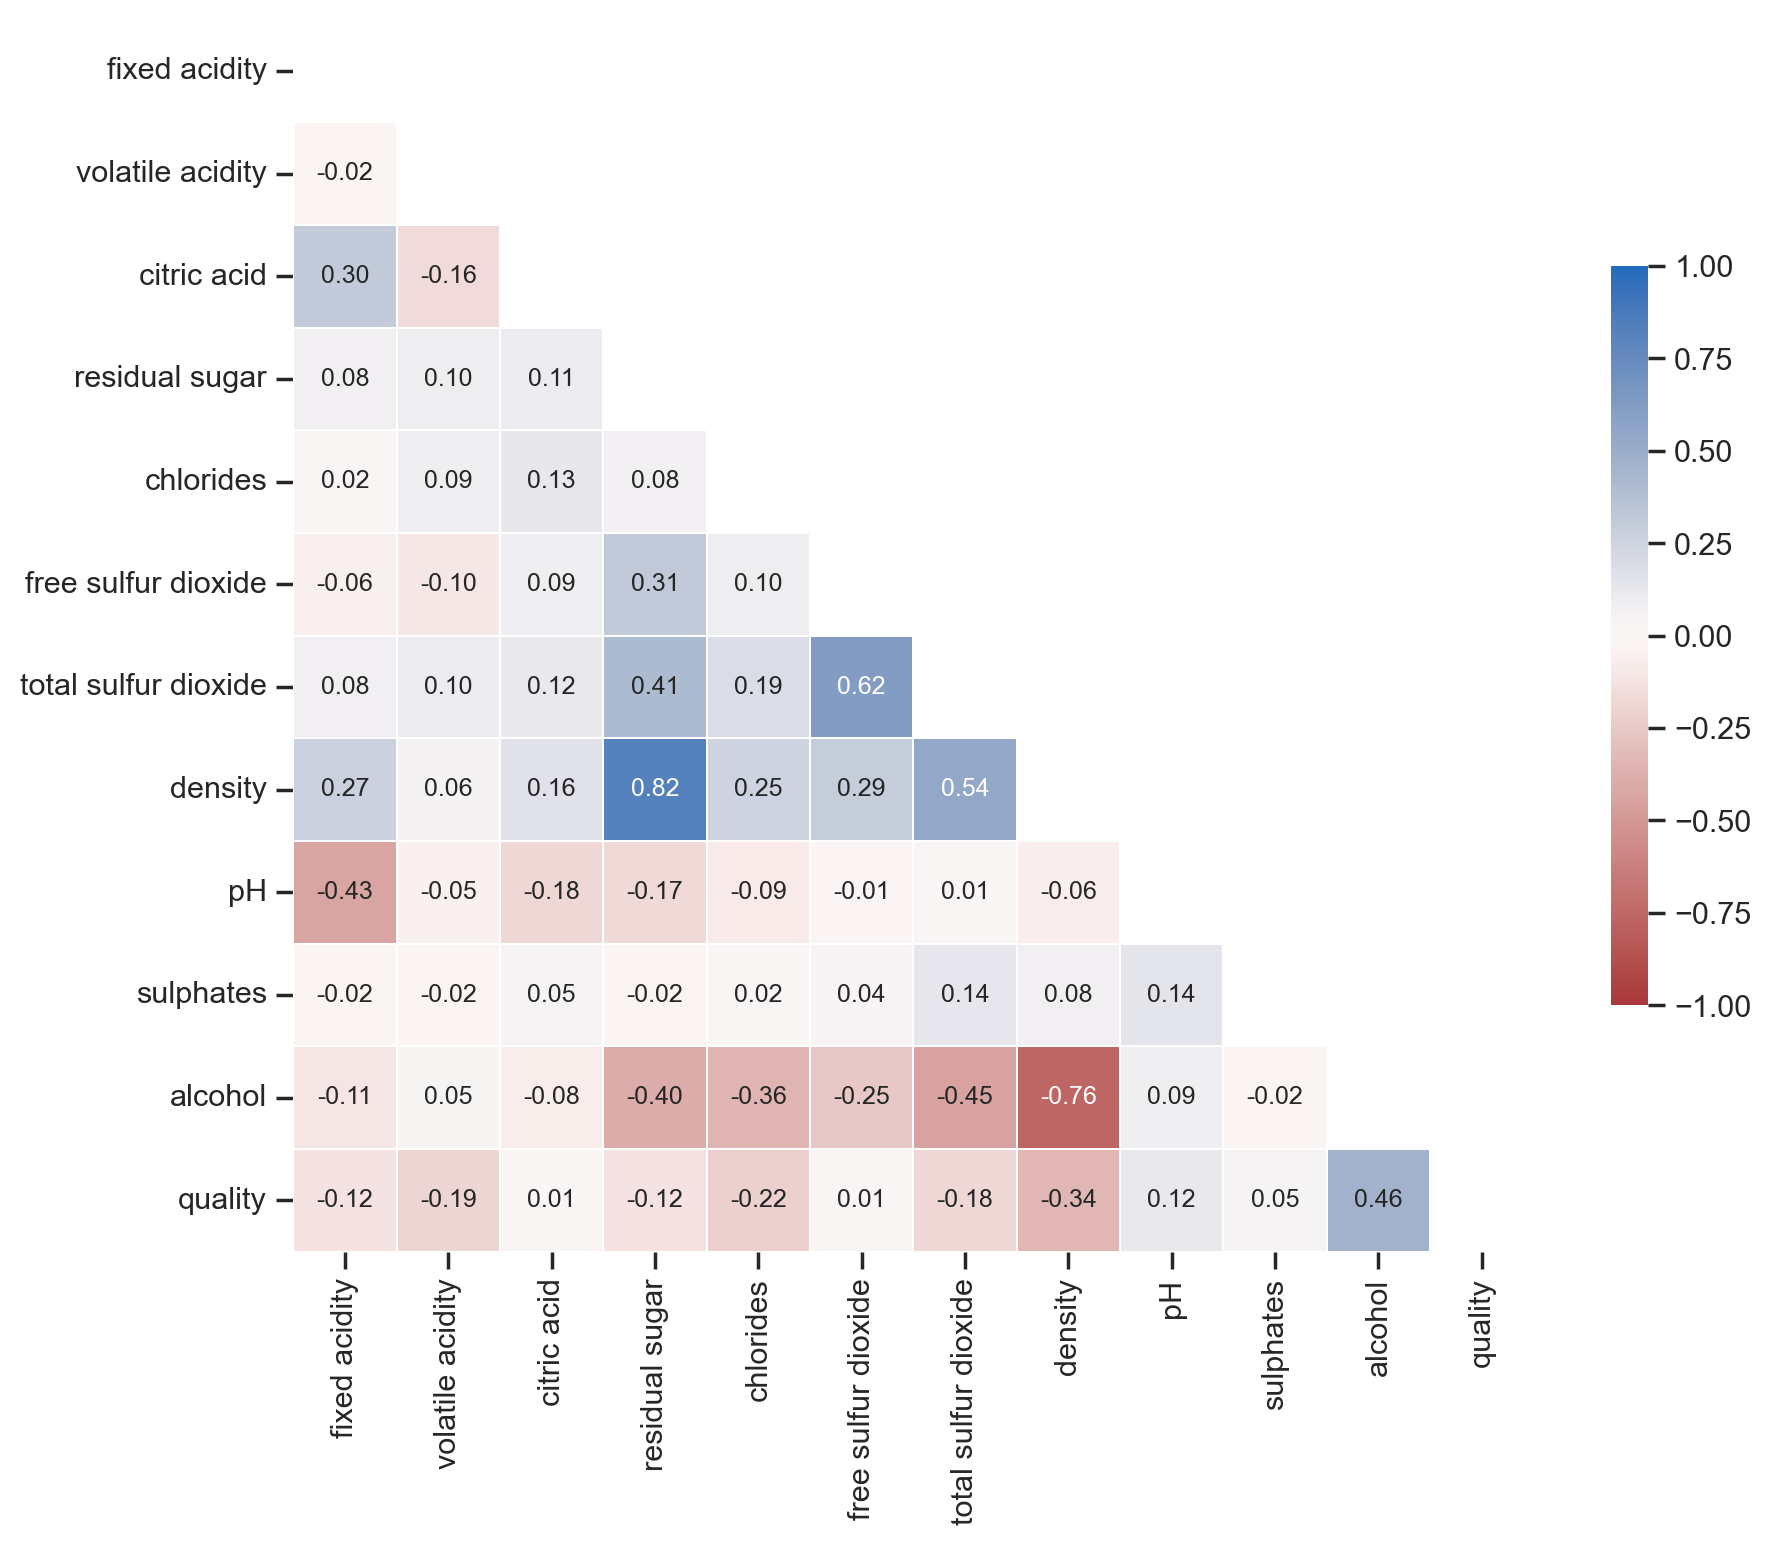

In [11]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, fmt='.2f',
            mask=np.triu(corr), 
            annot=True, annot_kws={'size':9}, 
            vmax=1, vmin=-1, center=0, 
            linecolor='w', linewidth=0.1, 
            cbar_kws={"shrink": 0.6}, cmap='vlag_r');

**Separate the target feature, split data in 7:3 proportion (30% form a holdout set, use random_state=17), and preprocess data with `StandardScaler`.**

In [12]:
X = data.drop(columns='quality').copy()
y = data['quality'].copy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=17)

#### Why we need to scale data: 
- Normalization: Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This is important for algorithms that **assume normality in the data distribution**. Normalization helps the algorithm to converge faster during optimization.
- Gradient Descent: For optimization algorithms like gradient descent (used in training neural networks and linear models), having features on similar scales can lead to a more efficient and stable convergence. 
- Regularization: Some regularization techniques, like L1 and L2 regularization used in linear models, can be sensitive to the scale of features. Scaling features helps ensure that regularization is applied fairly across all features.
- Distance-Based Algorithms: Algorithms that use distance metrics, such as k-means clustering or support vector machines, can be sensitive to the scale of features. Scaling ensures that the algorithm considers all features equally when calculating distances.

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear regression

**Train a simple linear regression model (Ordinary Least Squares).**

In [15]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

**<font color='red'>Question 1:</font> What are mean squared errors of model predictions on train and holdout sets?**

In [16]:
y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean squared error (train): {mse_train:.3f}") 
print(f"Mean squared error (test): {mse_test:.3f}") 

Mean squared error (train): 0.561
Mean squared error (test): 0.545


Answer: MSE for training set is 0.561. MSE for testing set is 0.545.

**Sort features by their influence on the target feature (wine quality). Beware that both large positive and large negative coefficients mean large influence on target. It's handy to use `pandas.DataFrame` here.**

**<font color='red'>Question 2:</font> Which feature this linear regression model treats as the most influential on wine quality?**

In [17]:
linreg_coef = pd.DataFrame(
    {
        'Coef':linreg.coef_, 
        'Abs_Coef': np.abs(linreg.coef_)
    }, index=X.columns
)
linreg_coef.sort_values(by='Abs_Coef', ascending=False)

,Coef,Abs_Coef
density,-0.346205,0.346205
residual sugar,0.314913,0.314913
alcohol,0.279340,0.279340
volatile acidity,-0.171910,0.171910
pH,0.107287,0.107287
sulphates,0.082734,0.082734
free sulfur dioxide,0.064928,0.064928
citric acid,0.042878,0.042878
chlorides,-0.017166,0.017166
fixed acidity,0.014059,0.014059


Answer: `density`, `residual sugar` and `alcohol` are the three features having the most influence on wine quality.

## Lasso regression

**Train a LASSO model with $\alpha = 0.01$ (weak regularization) and scaled data. Again, set random_state=17.**

In [18]:
lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, random_state=17)

**Which feature is the least informative in predicting wine quality, according to this LASSO model?**

In [19]:
lasso1_coef = pd.DataFrame(
    {
        'Coef':lasso1.coef_, 
        'Abs_Coef': np.abs(lasso1.coef_)
    }, index=X.columns
)
lasso1_coef.sort_values(by='Abs_Coef', ascending=True)

,Coef,Abs_Coef
total sulfur dioxide,-0.000000,0.000000
chlorides,-0.018790,0.018790
citric acid,0.025180,0.025180
fixed acidity,-0.033682,0.033682
pH,0.052808,0.052808
free sulfur dioxide,0.055408,0.055408
sulphates,0.058447,0.058447
density,-0.109146,0.109146
residual sugar,0.144405,0.144405
volatile acidity,-0.172808,0.172808


Answer: The feature `total sulfur dioxide` contributes the least in predicting wine quality.

**Train LassoCV with random_state=17 to choose the best value of $\alpha$ in 5-fold cross-validation.**

In [20]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, random_state=17, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5, random_state=17)

In [21]:
lasso_cv.alpha_

0.004150404757850477

**<font color='red'>Question 3:</font> Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?**

In [22]:
lasso_cv_coef = pd.DataFrame(
    {
        'Coef':lasso_cv.coef_, 
        'Abs_Coef': np.abs(lasso_cv.coef_)
    }, index=X.columns
)
lasso_cv_coef.sort_values(by='Abs_Coef', ascending=True)

,Coef,Abs_Coef
total sulfur dioxide,-0.003257,0.003257
fixed acidity,-0.005715,0.005715
chlorides,-0.017849,0.017849
citric acid,0.035375,0.035375
free sulfur dioxide,0.058988,0.058988
sulphates,0.072436,0.072436
pH,0.084607,0.084607
volatile acidity,-0.172770,0.172770
residual sugar,0.244894,0.244894
density,-0.249715,0.249715


Answer: Still `total sulfur dioxide` but better score

**<font color='red'>Question 4:</font> What are mean squared errors of tuned LASSO predictions on train and holdout sets?**

In [23]:
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean squared error (train): {mse_train:.3f}") 
print(f"Mean squared error (test): {mse_test:.3f}") 

Mean squared error (train): 0.562
Mean squared error (test): 0.548


Answer: MSE for training set is 0.562. MSE for testing set is 0.548.

## Random Forest

**Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.**

In [28]:
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=17)

**<font color='red'>Question 5:</font> What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [33]:
mse_rf_train = mean_squared_error(y_train, forest.predict(X_train_scaled))
mse_rf_test = mean_squared_error(y_test, forest.predict(X_test_scaled))
mse_rf_cv = np.mean(
    np.abs(
        cross_val_score(forest, 
                        X_train_scaled,
                        y_train, 
                        scoring='neg_mean_squared_error')
    )
)

print(f"Mean squared error (train): {mse_rf_train:.3f}")
print(f"Mean squared error (cv): {mse_rf_cv:.3f}")
print(f"Mean squared error (test): {mse_rf_test:.3f}")

Mean squared error (train): 0.070
Mean squared error (cv): 0.511
Mean squared error (test): 0.492


Answer: MSE for training set is 0.07, for cross validation is 0.511 and for testing set is 0.492

**Tune the `max_features` and `max_depth` hyperparameters with GridSearchCV and again check mean cross-validation MSE and MSE on holdout set.**

In [41]:
%%time

forest_params = {
    'max_depth': [20,21,22],
    'min_samples_leaf': [2, 4, 6],
    'max_features': [None, 2, 5, 8]
}

locally_best_forest = GridSearchCV(
    forest, 
    forest_params, 
    n_jobs=-1, 
    cv=5, 
    scoring ='neg_mean_squared_error',
    verbose=True)

locally_best_forest.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 1.25 s
Wall time: 38 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22],
                         'max_features': [None, 2, 5, 8],
                         'min_samples_leaf': [2, 4, 6]},
             scoring='neg_mean_squared_error', verbose=True)

In [42]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 2, 'min_samples_leaf': 2},
 -0.4985349416728736)

**<font color='red'>Question 6:</font> What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [48]:
# Calculate mean squared error using cross-validation on the best forest estimator
mse_cv_best_forest = np.mean(
    np.abs(
        cross_val_score(
            locally_best_forest.best_estimator_,
            X_train_scaled,
            y_train,
            scoring="neg_mean_squared_error",
        )
    )
)

# Calculate mean squared error on the test set using the best forest estimator
mse_test_best_forest = mean_squared_error(y_test, locally_best_forest.predict(X_test_scaled))


print(f"Mean squared error using cross-validation (best forest estimator): {mse_cv_best_forest:.3f}")
print(f"Mean squared error on the test set (best forest estimator): {mse_test_best_forest:.3f}")

Mean squared error using cross-validation (best forest estimator): 0.499
Mean squared error on the test set (best forest estimator): 0.488


Answer: 

Mean squared error using cross-validation (best forest estimator): 0.499

Mean squared error on the test set (best forest estimator): 0.488

In [49]:
mse_cv_best_forest = mean_squared_error(y_train, locally_best_forest.best_estimator_.predict(X_train_scaled))
mse_test_best_forest = mean_squared_error(y_test, locally_best_forest.best_estimator_.predict(X_test_scaled))

# Print the results
print(f"Mean squared error on the training set (best forest estimator): {mse_cv_best_forest:.3f}")
print(f"Mean squared error on the test set (best forest estimator): {mse_test_best_forest:.3f}")

Mean squared error on the training set (best forest estimator): 0.146
Mean squared error on the test set (best forest estimator): 0.488


**Output RF's feature importance. Again, it's nice to present it as a DataFrame.**<br>
**<font color='red'>Question 7:</font> What is the most important feature, according to the Random Forest model?**

In [61]:
rf_importance = pd.DataFrame(
    locally_best_forest.best_estimator_.feature_importances_, 
    index=X.columns, 
    columns=['Coef']
)
rf_importance_sorted = rf_importance.sort_values(by='Coef', ascending=False).reset_index()
rf_importance_sorted.columns=['Coef','Values']
rf_importance_sorted

,Coef,Values
0,alcohol,0.174211
1,density,0.114892
2,free sulfur dioxide,0.113655
3,volatile acidity,0.090896
4,total sulfur dioxide,0.084041
5,chlorides,0.080888
6,citric acid,0.076122
7,residual sugar,0.070839
8,pH,0.067644
9,fixed acidity,0.064386


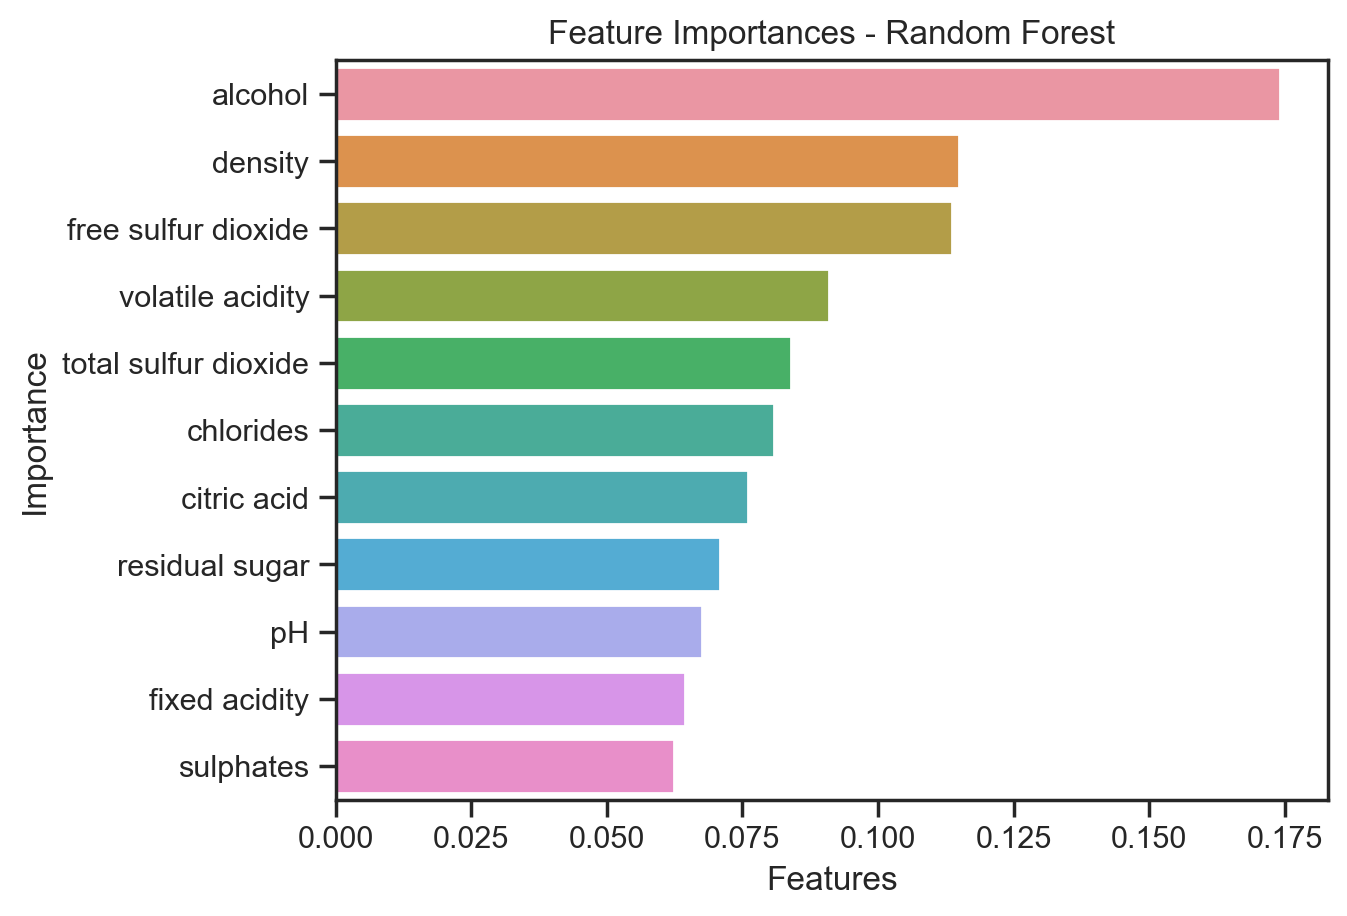

In [64]:
sns.barplot(data=rf_importance_sorted,  y='Coef', x='Values')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance');

**Make conclusions about the performance of the explored 3 models in this particular prediction task.**

The dependency of wine quality on other features in hand is, presumable, non-linear. So Random Forest works better in this task.